Pacotes

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]


import warnings
warnings.filterwarnings("ignore")

Importação dos dados

In [2]:
df_treino = pd.read_csv('dados/end_train.csv')
df_test = pd.read_csv('dados/end_test.csv')
ex_sub = pd.read_csv('dados/ex_submission.csv')

Visualização dos Dados

In [17]:
df_treino['density'].fillna(df_treino['density'].mean(), inplace=True)
df_treino['pH'].fillna(df_treino['pH'].mean(), inplace=True)

In [27]:
df_treino['citric acid'] = pd.to_numeric(df_treino['citric acid'])

In [28]:
df_treino.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bool
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0


In [19]:
df_treino.isna().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_bool            0
dtype: int64

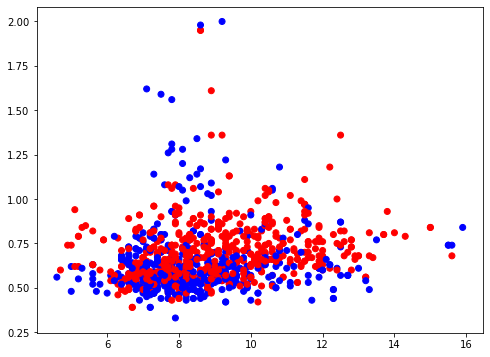

In [20]:
cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(df_treino['fixed acidity'], df_treino['sulphates'], c=df_treino['quality_bool'], cmap=cmap)

Definição dos Parâmetros

In [33]:
X_treino = [['residual sugar', 'sulphates', 'alcohol']]
y_treino = ['quality_bool']

In [34]:
clf = LogisticRegression()

#Treina e realiza a predição
clf.fit(X, y)
y_pred = clf.predict(X)

plt.scatter(X, y, s=30)
plt.scatter(X, y_pred, s=5)

#Imprime as Métricas 
print('Acurácia = ', accuracy_score(y, y_pred),
      '\nPrecisão = ', precision_score(y, y_pred),
      '\nRecall = ', recall_score(y, y_pred),
      '\nF1_SCORE = ', f1_score(y, y_pred))

xg = np.linspace(X.min() - 0.1, X.max() + 0.1, 100).reshape(-1, 1)
plt.plot(xg, clf.predict_proba(xg)[:,1])
plt.plot(xg, 0.5 * np.ones(100))

ValueError: could not convert string to float: 'residual sugar'